In [1]:
import matplotlib
import matplotlib
matplotlib.use("Qt5Agg")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import cv2
import glob
import pickle

In [2]:
# Arrays to store object points and image points from all the images
objpoints = []   # 3D points in real world space
imgpoints = []   # 2D points in image plane

nx = 9
ny = 6


# Prepare object pionts, like(0, 0, 0), (1, 0, 0) , (2,0,0) ..,(6,5,0)
objp = np.zeros((nx*ny, 3), np.float32)
objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) # x, y coordinates


In [3]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 
            30, 0.001)

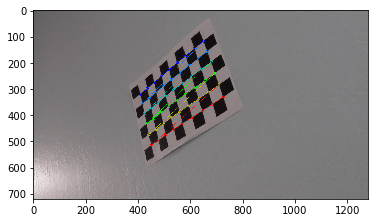

In [4]:
images = glob.glob('camera_cal/*.jpg')

# Go through all images and find corners
for fname in images:
    
    # read in an image
    img = cv2.imread(fname)
    
    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners)
        
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)
        
    else:
        print('Warning: ret = {} for {}'.format(ret, fname))

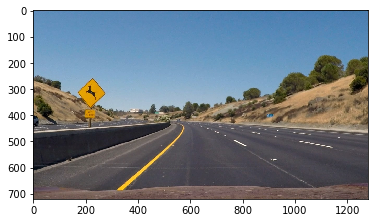

In [9]:

img = plt.imread('test_images/test2.jpg')
img_size = (img.shape[1], img.shape[0])
plt.imshow(img)


In [10]:
# Calibrate camera and undistort a test image
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,
                                                  imgpoints,
                                                  img_size,
                                                  None, None)

In [11]:
dst = cv2.undistort(img, mtx, dist, None, mtx)

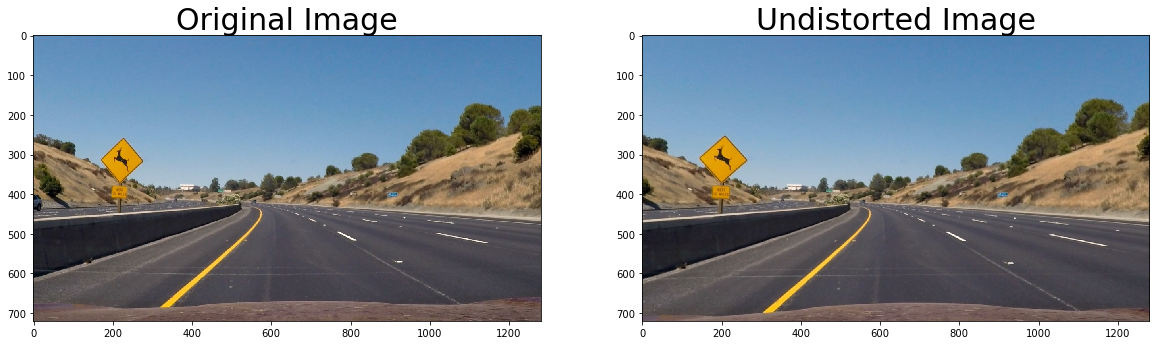

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [13]:
img == dist

/home/nvidia/anaconda2/envs/tf/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


False